In [2]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

%matplotlib inline

In [57]:
# import Fashion Box Subscription Upgrade

fashion = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/SKP_fashion.csv")

In [58]:
fashion.head() #examine

,age,income,months_subbed,upgrade
0,22,108.99,35,1
1,32,58.63,46,1
2,38,62.89,35,1
3,14,74.39,19,1
4,33,60.11,8,1


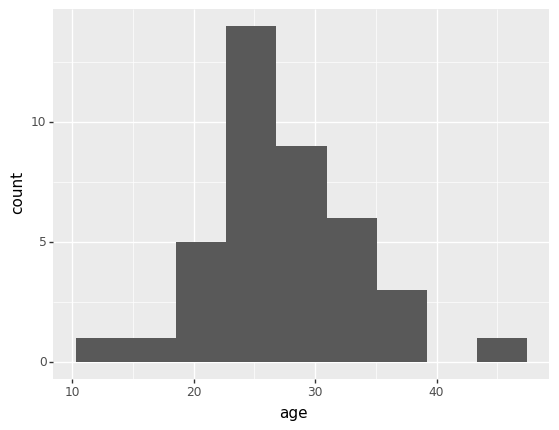

<ggplot: (-9223372036550652798)>

In [59]:
# plot

(ggplot(fashion, aes(x = 'age')) + geom_histogram())

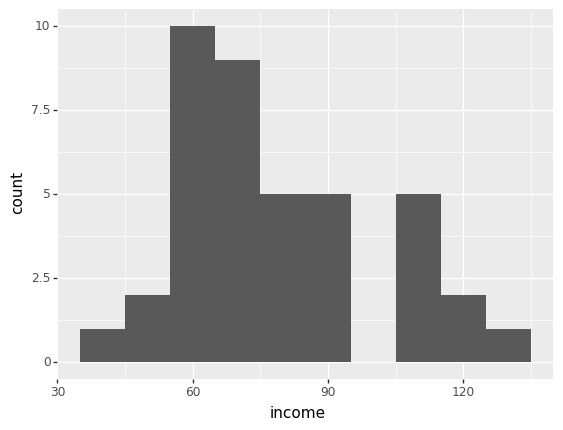

<ggplot: (-9223372036550541438)>

In [60]:
# plot

(ggplot(fashion, aes(x = 'income')) + geom_histogram(binwidth = 10))

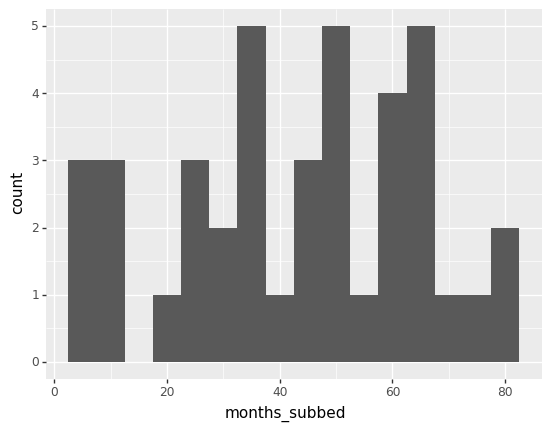

<ggplot: (-9223372036550538408)>

In [61]:
# plot

(ggplot(fashion, aes(x = 'months_subbed')) + geom_histogram(binwidth = 5))

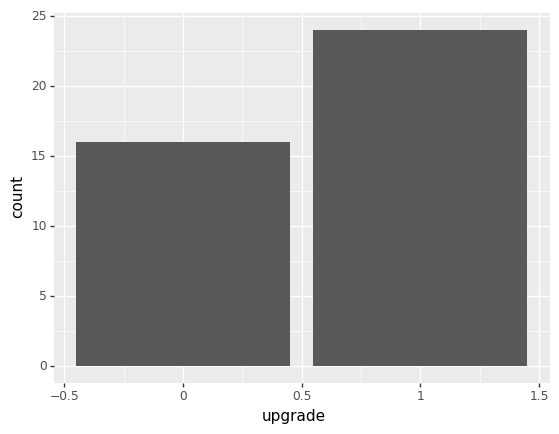

<ggplot: (303883640)>

In [62]:
# plot
(ggplot(fashion, aes(x = 'upgrade')) + geom_bar())

# Inference

In [91]:
Y = fashion["upgrade"]
X = fashion.iloc[:,0:3]
X = sm.add_constant(X)

0     1
1     1
2     1
3     1
4     1
5     1
6     0
7     0
8     0
9     1
10    1
11    0
12    0
13    1
14    1
15    1
16    1
17    1
18    0
19    1
20    1
21    0
22    0
23    1
24    0
25    0
26    1
27    0
28    1
29    0
30    1
31    1
32    0
33    1
34    1
35    0
36    1
37    0
38    0
39    1
Name: upgrade, dtype: int64

In [64]:
model = sm.Logit(Y,X)

In [65]:
output = model.fit()

Optimization terminated successfully.
         Current function value: 0.597171
         Iterations 6


In [66]:
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                upgrade   No. Observations:                   40
Model:                          Logit   Df Residuals:                       36
Method:                           MLE   Df Model:                            3
Date:                Tue, 18 Feb 2020   Pseudo R-squ.:                  0.1127
Time:                        19:48:00   Log-Likelihood:                -23.887
converged:                       True   LL-Null:                       -26.920
Covariance Type:            nonrobust   LLR p-value:                    0.1084
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.9777      2.781     -1.071      0.284      -8.427       2.472
age               0.1445      0.073      1.977      0.048       0.001       0.288
income           -0.0066      0.017     -0.397      0.691      -0.039       0.026
months_subbed     0.0015      0.016      0.089      0.929      -0.030       0.033
=================================================================================
"""

In [67]:
np.exp(output.params)

const            0.050909
age              1.155514
income           0.993470
months_subbed    1.001460
dtype: float64

In [81]:
liz = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Lizzo_data.csv")

In [102]:
liz.head()
liz.columns

Index(['Unnamed: 0', 'artist_name', 'artist_id', 'album_id', 'album_type',
       'album_release_date', 'album_release_year',
       'album_release_date_precision', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'track_id', 'analysis_url',
       'time_signature', 'disc_number', 'duration_ms', 'explicit',
       'track_href', 'is_local', 'track_name', 'track_preview_url',
       'track_number', 'type', 'track_uri', 'external_urls.spotify',
       'album_name', 'key_name', 'mode_name', 'key_mode'],
      dtype='object')

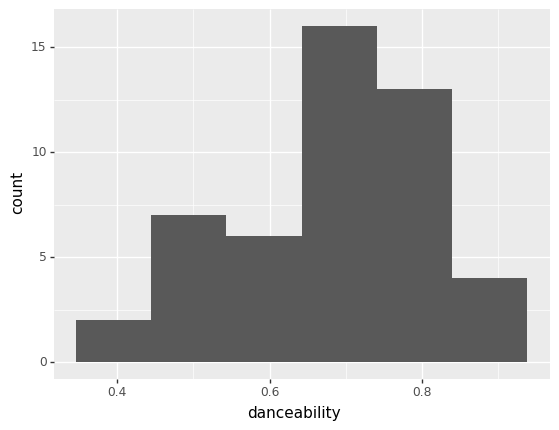

<ggplot: (303502193)>

In [99]:
(ggplot(liz, aes("danceability")) + geom_histogram())

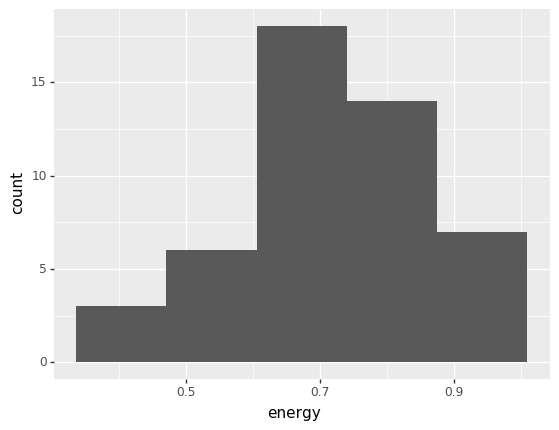

<ggplot: (303413554)>

In [100]:
(ggplot(liz, aes("energy")) + geom_histogram())

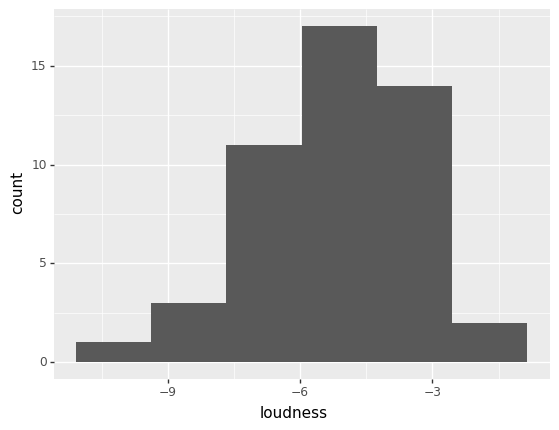

<ggplot: (-9223372036550559558)>

In [104]:
(ggplot(liz, aes("loudness")) + geom_histogram())

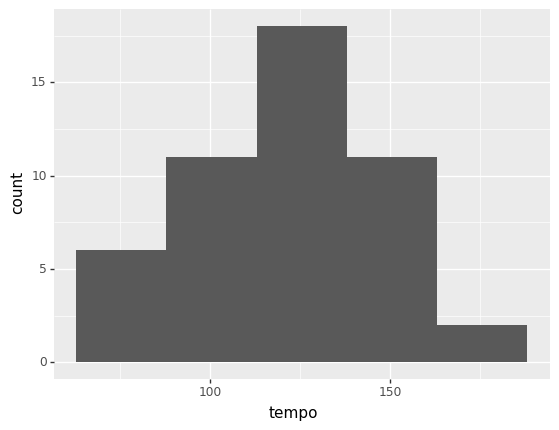

<ggplot: (-9223372036550143891)>

In [105]:
(ggplot(liz, aes("tempo")) + geom_histogram())

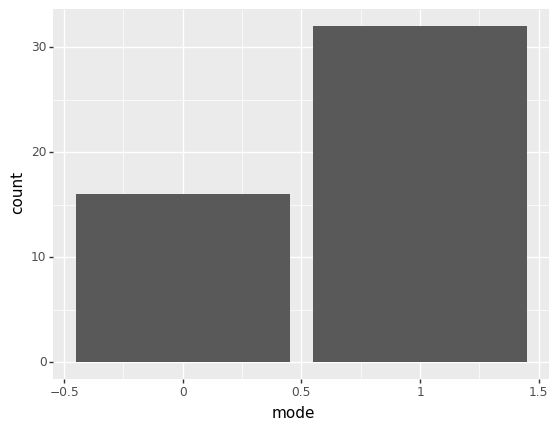

<ggplot: (-9223372036551068451)>

In [101]:
(ggplot(liz, aes("mode")) + geom_bar())

# can we predict major or minor?

In [94]:
Y = liz["mode"]
colsToKeep = liz.columns.isin(["danceability", "energy", "loudness", "tempo"])
X = liz.loc[:,colsToKeep]
X = sm.add_constant(X)

In [95]:
model = sm.Logit(Y,X)

In [96]:
output = model.fit()

Optimization terminated successfully.
         Current function value: 0.632933
         Iterations 5


In [97]:
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   mode   No. Observations:                   48
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                            2
Date:                Tue, 18 Feb 2020   Pseudo R-squ.:                0.005626
Time:                        20:38:51   Log-Likelihood:                -30.381
converged:                       True   LL-Null:                       -30.553
Covariance Type:            nonrobust   LLR p-value:                    0.8421
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.9384      1.967      0.477      0.633      -2.918       4.795
danceability    -1.3776      2.580     -0.534      0.593      -6.434       3.679
energy           0.9642      2.361      0.408      0.683      -3.663       5.592
================================================================================
"""

In [98]:
np.exp(output.params)

const           2.555909
danceability    0.252175
energy          2.622678
dtype: float64

# Prediction

In [1]:
from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics

1. Model Create
2. Fit
3. Predict

In [3]:
# data
fashionBIG = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/SKP_fashionBIG.csv")
fashionBIG.head()

,age,income,months_subbed,upgrade
0,22,55.89,14,0
1,32,86.03,57,0
2,38,49.22,37,1
3,14,92.71,51,1
4,33,94.06,37,0


In [8]:
predictors = ["age", "income", "months_subbed"]

X_train, X_test, y_train, y_test = train_test_split(fashionBIG[predictors], fashionBIG["upgrade"], test_size=0.2)
X_train.head()

zscore = StandardScaler()
zscore.fit(X_train)
Xz_train = zscore.transform(X_train)
Xz_test = zscore.transform(X_test)

In [10]:
myLogit = LogisticRegression() #create

In [11]:
myLogit.fit(Xz_train,y_train) #fit

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
predictedVals = myLogit.predict(Xz_test) #predict

In [13]:
accuracy_score(y_test,predictedVals)

0.59

In [14]:
confusion_matrix(y_test,predictedVals)

array([[21, 62],
       [20, 97]])

## Predict new Data

In [15]:
fashionNEW = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/SKP_fashionNEW.csv")

Xnew = fashionNEW.iloc[:,0:3]
Xnewz = zscore.transform(Xnew)

In [16]:
Ypred = myLogit.predict(Xnewz)

In [17]:
accuracy_score(fashionNEW["upgrade"], Ypred)

0.591

In [18]:
confusion_matrix(fashionNEW["upgrade"], Ypred)

array([[ 97, 300],
       [109, 494]])